# Explore here

In [1]:
import os
import pandas as pd
import seaborn as sns
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import os

# load the .env file variables
load_dotenv()



client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")


spotify = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = client_id,client_secret = client_secret))


artist_url = 'spotify:artist:6mdiAmATAx73kdxrNrnlao'
results = spotify.artist_top_tracks(artist_url)

df = []
fields = ["name","popularity","duration_ms"]
Songlist = []

for track in results['tracks']:
    tempdict = {}
    for k,v in track.items():
        if k in fields:
            tempdict[k] = v
    Songlist.append(tempdict)

Dfsongs = pd.DataFrame.from_dict(Songlist)
Dfsongs.sort_values(["popularity"], ascending=False, inplace = True)

print(Dfsongs.head(3))

        







   duration_ms                              name  popularity
0       252733       The Trooper - 2015 Remaster          72
1       438120  Fear of the Dark - 2015 Remaster          69
2       233506  Run to the Hills - 2015 Remaster          69


Tal y como se muestra en el gráfico, no se aprecia relación entre la duración y la popularidad


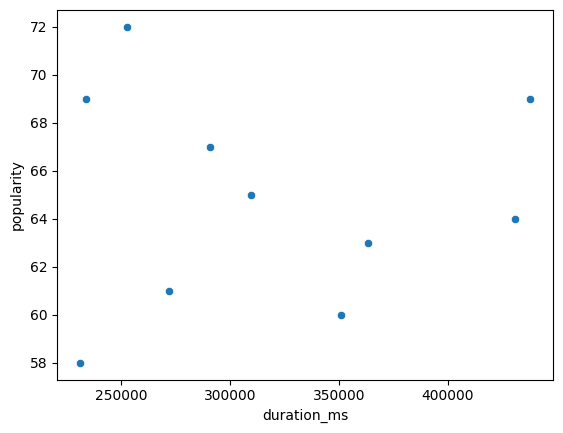

In [2]:
x = "duration_ms"
y = "popularity"

scatter_plot = sns.scatterplot(data = Dfsongs, x = x , y = y)
fig = scatter_plot.get_figure()
print("Tal y como se muestra en el gráfico, no se aprecia relación entre la duración y la popularidad")
